In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("Ahmad_Mayorga-Llano_Khalid.csv")
df = df.iloc[:, :-2]

In [12]:
df.rename(columns={
        "fruits-vegetables-nuts-estimate-from-ingredients_100g": "fruit_vege_nut_100g",
    },
    inplace=True
)

In [13]:
df

,code,brands,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade,energy-kj_100g,sugars_100g,saturated-fat_100g,salt_100g,proteins_100g,fiber_100g,fruit_vege_nut_100g
0,7501030459620,Bimbo,Multigrano arandanos y sabor fresa,Biscuits and cakes,11.0,d,1940.0,29.4,4.41,0.411,5.88,5.88,15.000000
1,3222476920348,Casino,Les gourmandises chocolat noir et fruits - Fra...,Sweets,21.0,e,1958.0,60.0,13.00,0.020,3.30,4.60,23.000000
2,4316268596466,"Clarkys, Netto MD",Tortilla Chips - Salted,One-dish meals,1.0,b,1979.0,0.8,2.00,0.900,6.60,4.00,0.000000
3,5941768000183,Sweet & Safe,Stevia chocolate,Chocolate products,14.0,d,1741.1,14.4,20.20,0.300,11.30,10.20,0.000000
4,8005190401455,Maina,Il Pandoro,Pastries,19.0,e,1695.0,18.0,12.00,0.650,8.40,1.60,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3245391055216,Grand Jury,Génoises Orange,Biscuits and cakes,17.0,d,1610.0,52.0,6.00,0.150,3.00,2.00,11.000000
306,7622300692506,"Milka,Kraft Foods",Chocolat au lait du Pays Alpin,Chocolate products,25.0,e,2210.0,59.0,18.00,0.000,6.10,1.80,0.390625
307,4000358009119,Leupoldt,Soßenkuchen,Biscuits and cakes,3.0,c,1507.0,29.0,0.20,0.050,7.90,2.90,0.000000
308,3410280020495,Top budget,Soufflé à la cacahuète,Appetizers,19.0,e,2039.0,1.8,7.40,1.430,10.50,0.00,19.000000


In [14]:
grade_palette = {
    "a": "#00823F",
    "b": "#86BC2B",
    "c": "#FECC00",
    "d": "#EE8200",
    "e": "#E73C09",
}

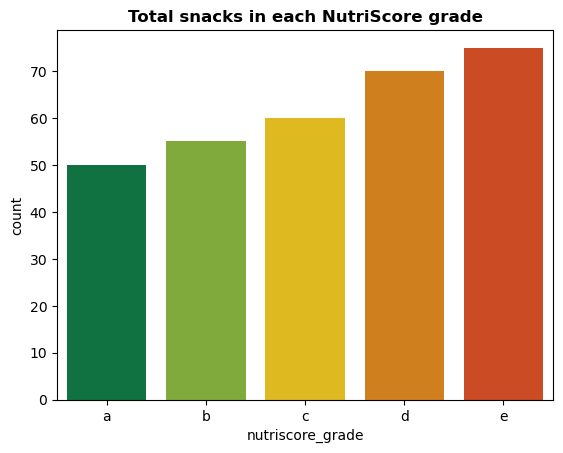

In [15]:
sns.countplot(df, x="nutriscore_grade", order="abcde", palette=grade_palette).set_title("Total snacks in each NutriScore grade", weight='bold')
plt.show()

In [16]:
criterias = df.columns[-7:].tolist()

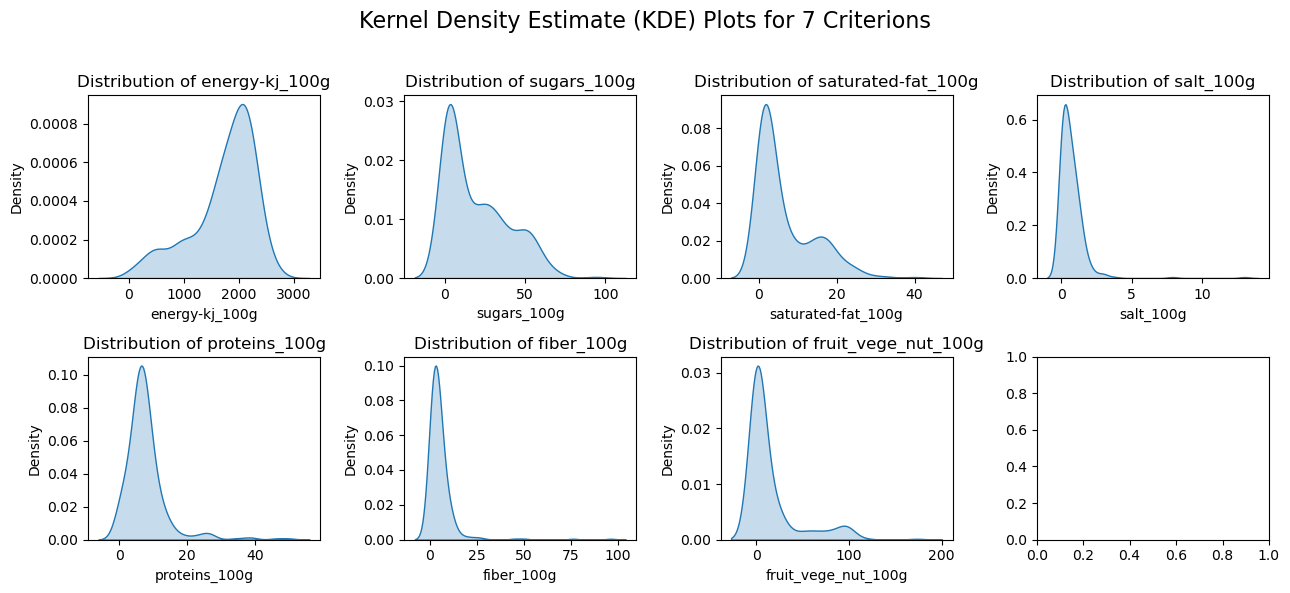

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(13, 6))
fig.suptitle('Kernel Density Estimate (KDE) Plots for 7 Criterions', fontsize=16)

# Flatten the subplot axes for easier iteration
axes = axes.flatten()

# Loop through each feature and create KDE plots
for i, feature in enumerate(criterias):
    sns.kdeplot(data=df[feature], ax=axes[i], fill=True)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

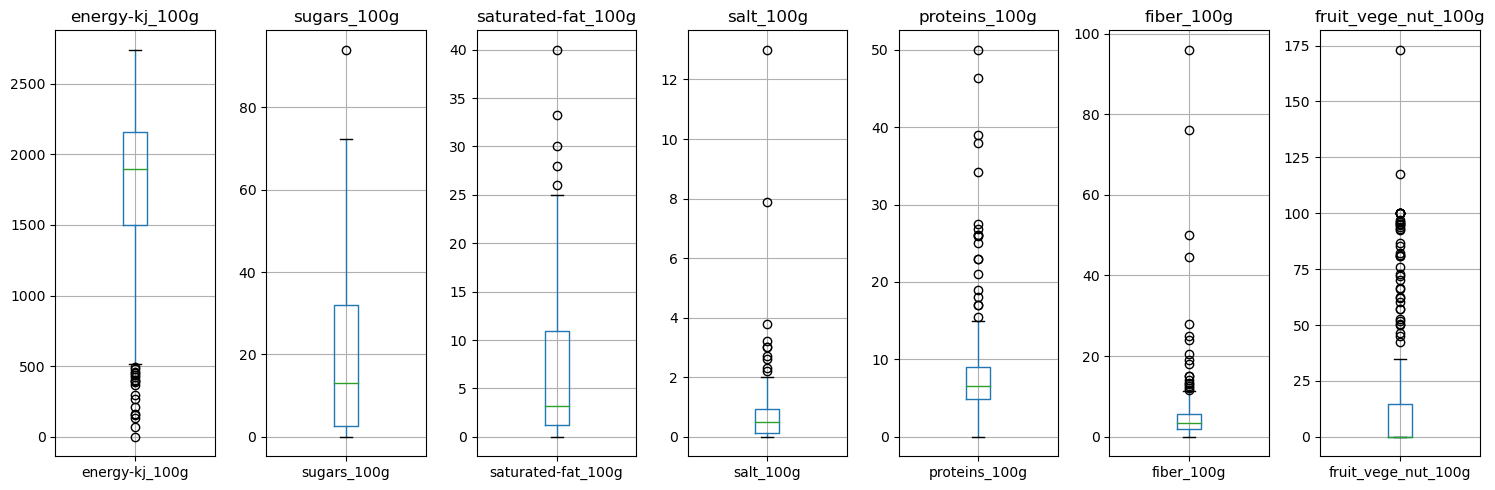

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 5))

for i, feature in enumerate(criterias):
    df.boxplot(column=feature, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()

# Show the plot
plt.show()

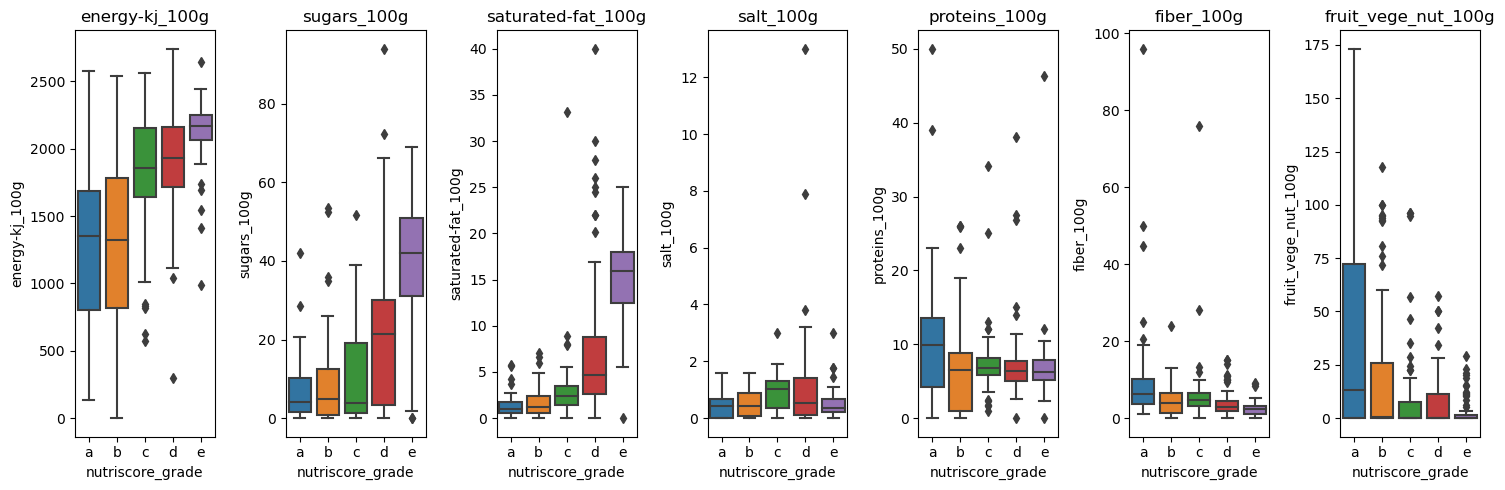

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 5))

# Iterate through each feature and create a boxplot grouped by class
for i, feature in enumerate(criterias):  # Exclude the 'Class' column
    sns.boxplot(x='nutriscore_grade', y=feature, data=df, ax=axes[i], order="abcde")
    axes[i].set_title(feature)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

- Energy: a and b are similar (lowest), c and d are similar (middle), while e is the highest
- Sugars: a,b,c have similar median, d is higher, and e is the highest
- Saturated Fat: a,b has similar median, c abit higher, d more, and e the most
- Salt: a,b,d,e are similar, c is the highest
- Proteins: a is the highest, while b,c,d,e is lower but similar
- Fibre: a is higher, b, c is similar, d,e is similar
- Fruits,Vege & Nuts: mostly 0, only a has a median that is above

- Energy is highly correlated with fat, and moderately correlated with sugars and proteins
- Fat is also correlated to sugars
- Sugars and salt are slightly negative correlated

Things to consider?
- inspect fruit-vege-nuts further
- deal with energy correlation
- deal with fat correlation
- consider dealing with sugar correlation
- 

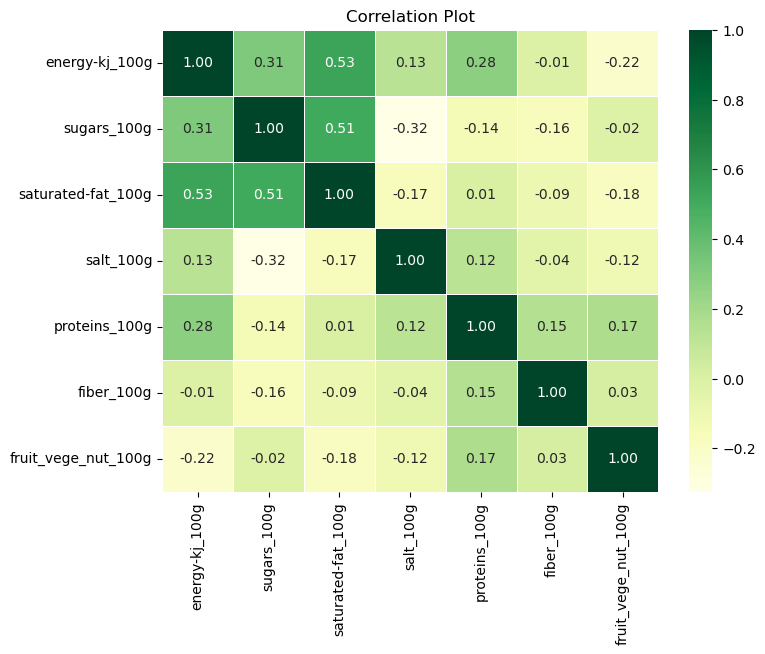

In [24]:
# Calculate the correlation matrix
correlation_matrix = df[criterias].corr()

# Set up subplots with 1 row and 1 column
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of the correlation matrix
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt=".2f", linewidths=0.5, ax=ax)

# Set title
plt.title('Correlation Plot')

# Show the plot
plt.show()

In [25]:
df.columns

Index(['code', 'brands', 'product_name', 'pnns_groups_2', 'nutriscore_score',
       'nutriscore_grade', 'energy-kj_100g', 'sugars_100g',
       'saturated-fat_100g', 'salt_100g', 'proteins_100g', 'fiber_100g',
       'fruit_vege_nut_100g'],
      dtype='object')

In [12]:
# df = pd.read_csv("Ahmad_Mayorga-Llano_Khalid.csv")
# df.loc[df["fruits-vegetables-nuts-estimate-from-ingredients_100g"] > 100]

,code,brands,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade,energy-kj_100g,sugars_100g,saturated-fat_100g,salt_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,url,image_url
171,3281780886450,Martinet,PORTION 2CAROTTE/2COLESLAW,One-dish meals,-1.0,a,435.0,5.75,0.5,0.93,1.05,2.6,173.171875,http://world-fr.openfoodfacts.org/produit/3281...,NaN
214,3560071012687,Carrefour,"Vitalité Cranberries, noix de cajou, noix de p...",Dried fruits,2.0,b,2155.0,36.00,4.9,0.02,9.10,7.2,117.750000,http://world-fr.openfoodfacts.org/produit/3560...,https://images.openfoodfacts.org/images/produc...


In [27]:
e = df.loc[(df.nutriscore_grade == "c") | (df.nutriscore_grade == "e")]

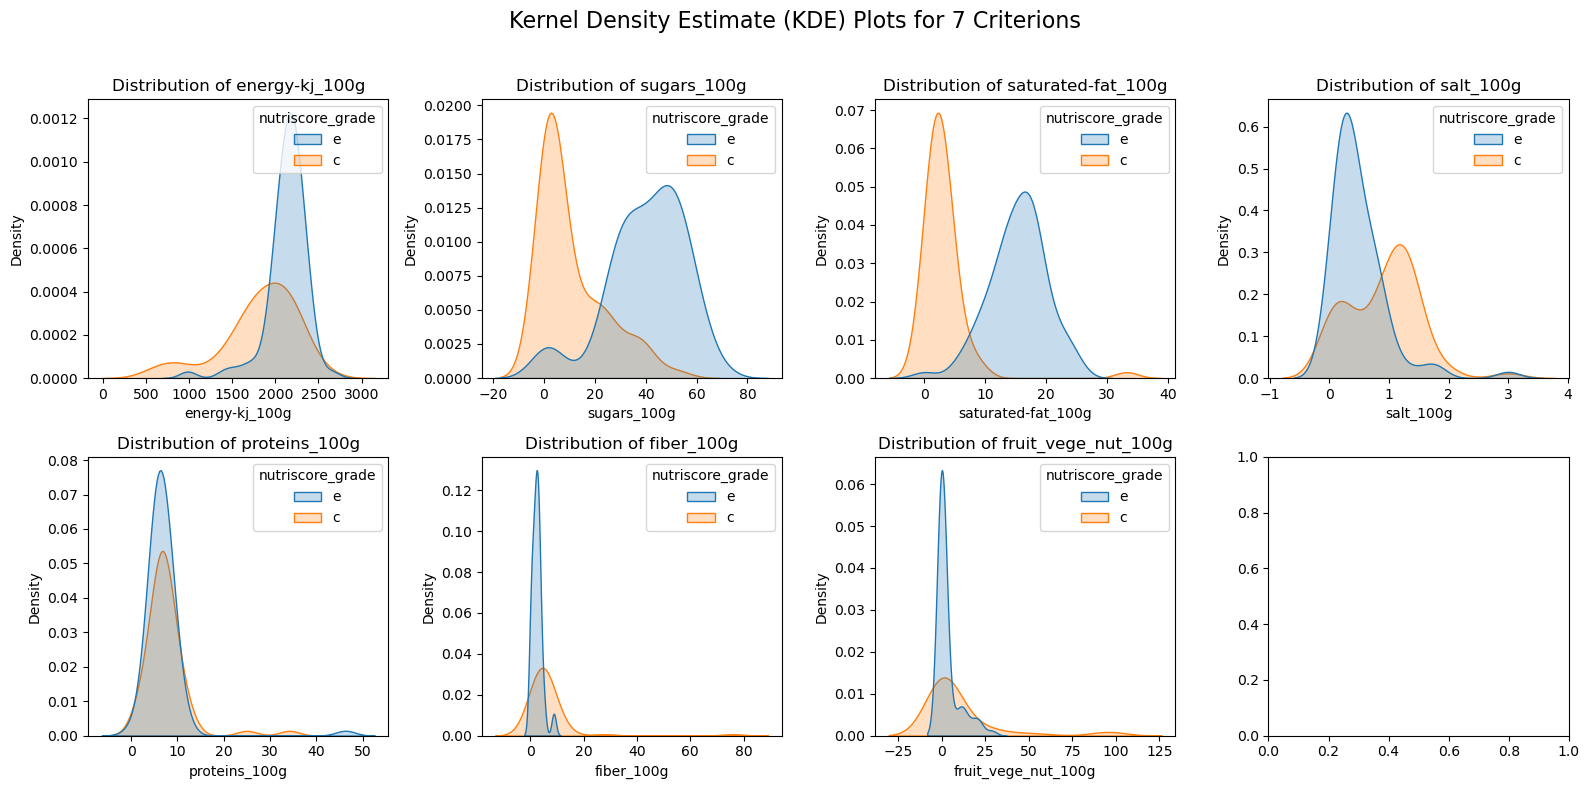

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Kernel Density Estimate (KDE) Plots for 7 Criterions', fontsize=16)

# Flatten the subplot axes for easier iteration
axes = axes.flatten()

# Loop through each feature and create KDE plots
for i, feature in enumerate(criterias):
    # print([[feature]+["nutriscore_grade"]])
    sns.kdeplot(data=e[[feature]+["nutriscore_grade"]], ax=axes[i], fill=True, x=feature, hue="nutriscore_grade")
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()